# Project: Energy consumption in the world based on level of technology and income in selected countries

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='introduction'></a>
## Introduction

> I have selected few tables from <a href="https://www.gapminder.org/data/" target="_blank">Gapminder project</a> and one additional table with categorization of countries to its continents from <a href="https://datahub.io/JohnSnowLabs/country-and-continent-codes-list" target="_blank">Data Hub</a>. From Gapminder I have chosen dataset **Residentual electricity use per person in kilowatt/hours as dependent variable of various technology indicators** (personal computers per 100 people, cell phones per 100 people, internet users as % of population, urban population as % of population and income per person as one not tech related indicator. After viewing different years in each table, I have decided to **select two recent years 2000 and 2005**.

> My main question was: **How does countries with high electricity consumption differ from countries with low electricity consumption?** I will try to find the answers in two sections: 
1. **Difference in regional representation**
2. **Difference in tech and income level** 

>Therefore, my main question can be divided in few more minor questions:
1. How are different regions (continents) represented in groups of high or low electricity consumption contries?
    - In which regions and countries we can see highest increase in electricity consumption between 2000 and 2005?
    - Can we see *mobility* of regions between low and high electricity groups between 2000 and 2005?    
2. How do high electricity consumption countries differ in ownership of personal computers, phones, proportion of internet users in population, urbanization and level of income?
    - Which variable from tech indicators and income has the strongest correlation with electricity consumption?
    - Can we observe low electricity consumption countries cathing up to high electricity countries in terms of tech indicators or income over time, in our case from 2000 to 2005?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> All tables needed are loaded below:

In [2]:
comp = pd.read_csv('computers_per_100_people.csv')
phone = pd.read_csv('cell_phones_per_100_people.csv')
regions = pd.read_csv('country-and-continent-codes.csv')
internet = pd.read_csv('internet_users.csv')
urban = pd.read_csv('urban_population_percent_of_total.csv')
income = pd.read_csv('income_per_person_gdppercapita.csv')
electricity = pd.read_csv('residential_electricity_use_per_person.csv')

I checked all files in Excel and used vlookup to make sure names of countries used in Gapminders datasets and names of countries in regions table from Data Hub match. I made just few changes in names *(for example when one source used **Macedonia** and other **Macedonia, FYR** as country name, I corrected it just to one version: Macedonia, FYR)*

> Below, I checked for missing values and different date ranges of each variables. Based on this I have chosen to focus only on years 2000 and 2005 as these years were present in all datasets with not so many missing values.

In [3]:
comp.head(4)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28,0.32
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,0.16,0.32,0.49,0.65,0.82,0.98,1.17,1.36,1.54,1.73,3.81
2,Algeria,0.1,0.15,0.18,0.22,0.26,0.3,0.45,0.48,0.54,0.60,0.66,0.71,0.77,0.83,0.90,1.07,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,0.08,0.09,0.11,0.12,0.18,NaN,NaN,0.59,0.70


In [4]:
comp.isnull().sum()

country      0
1990       126
1991       120
1992       114
1993       106
1994        94
1995        77
1996        69
1997        55
1998        35
1999        29
2000        25
2001         7
2002         7
2003         9
2004        11
2005        16
2006        86
dtype: int64

In [5]:
phone.head(4)

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.9,37.5,35.5,46.4,50.0,53.0,56.2,58.4,62.3,67.4
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.2,83.2,91.6,106.0,120.0,126.0,115.0,116.0,115.0,119.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.5,92.3,90.8,96.7,99.9,103.0,111.0,108.0,116.0,121.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.6,76.4,77.6,77.7,77.5,79.1,83.6,91.4,98.5,104.0


In [6]:
phone.isnull().sum()

country      0
1980       193
1981       190
1982       188
1983       188
1984       186
1985       177
1986       167
1987       160
1988       156
1989       152
1990       135
1991       124
1992       105
1993        87
1994        74
1995        60
1996        39
1997        32
1998        24
1999        21
2000        15
2001        15
2002        11
2003         7
2004         4
2005         4
2006         6
2007         4
2008         6
2009         4
2010         1
2011         2
2012         1
2013         2
2014         2
2015         0
2016         2
2017        27
dtype: int64

In [7]:
regions.head(4)

,Country,Continent_Name,Continent_Code,Two_Letter_Country_Code,Country_Number
0,Afghanistan,Asia,AS,AF,4.0
1,Albania,Europe,EU,AL,8.0
2,Antarctica,Antarctica,AN,AQ,10.0
3,Algeria,Africa,AF,DZ,12.0


In [8]:
regions.isnull().sum()

Country                     0
Continent_Name              0
Continent_Code             42
Two_Letter_Country_Code     1
Country_Number              4
dtype: int64

In [9]:
internet.head(4)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,10.6,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,0.01120,0.03220,0.0486,0.0650,...,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,NaN
2,Algeria,NaN,NaN,NaN,NaN,0.00036,0.00177,0.00174,0.0103,0.0202,...,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,1.53000,3.0500,6.8900,...,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,NaN


In [10]:
internet.isnull().sum()

country      0
1990       174
1991       163
1992       151
1993       139
1994       119
1995        75
1996        38
1997        25
1998        18
1999        12
2000        10
2001         8
2002         8
2003        13
2004        10
2005         9
2006        10
2007         3
2008         4
2009         5
2010         5
2011         2
2012         5
2013         3
2014         3
2015         3
2016         3
2017       122
dtype: int64

In [11]:
urban.head(4)

,country,region,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,Asia,8.4,8.68,8.98,9.28,9.59,9.9,10.2,10.6,...,23.3,23.5,23.7,23.9,24.2,24.4,24.6,24.8,25.0,25.3
1,Albania,Europe,30.7,30.90,31.00,31.10,31.20,31.2,31.3,31.4,...,50.0,51.1,52.2,53.2,54.3,55.4,56.4,57.4,58.4,59.4
2,Algeria,Africa,30.5,31.80,33.20,34.70,36.10,37.6,38.8,39.0,...,66.1,66.8,67.5,68.2,68.9,69.6,70.2,70.8,71.5,72.1
3,Andorra,Europe,58.5,61.00,63.50,65.90,68.20,70.4,72.6,74.6,...,89.0,88.9,88.8,88.7,88.6,88.5,88.4,88.3,88.2,88.2


In [12]:
urban.isnull().sum()

country    0
region     0
1960       2
1961       2
1962       2
1963       2
1964       2
1965       2
1966       2
1967       2
1968       2
1969       2
1970       2
1971       2
1972       2
1973       2
1974       2
1975       2
1976       2
1977       2
1978       2
1979       2
1980       2
1981       2
1982       2
1983       2
1984       2
1985       2
1986       2
1987       2
1988       2
1989       2
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       1
2013       1
2014       1
2015       1
2016       1
2017       1
dtype: int64

In [13]:
income.head(4)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1290,1300,1530,1610,1660,1840,1810,1780,1750,1740
1,Albania,667,667,667,667,667,668,668,668,668,...,8450,9150,9530,9930,10200,10400,10500,10700,11000,11400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12700,12600,12900,13000,13200,13300,13500,13700,14000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,43400,41400,41700,39000,42000,41900,43700,44900,46600,48200


In [14]:
income.isnull().sum().any()

False

In [15]:
electricity.head(4)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,643.0,709.0,689.0,875.0,854.0,788.0,767.0,552.0,575.0,636.0
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,353.0,373.0,390.0,410.0,452.0,466.0,533.0,504.0,532.0,591.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.6,76.1,84.9,89.4,98.3,107.0,123.0,134.0,147.0,173.0
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,555.0,570.0,578.0,554.0,557.0,575.0,615.0,654.0,709.0,768.0


In [16]:
electricity.isnull().sum()

country      0
1960       106
1961       106
1962       106
1963       106
1964       106
1965       105
1966       105
1967       105
1968       105
1969       105
1970       105
1971        36
1972        37
1973        35
1974        35
1975        33
1976        32
1977        32
1978        32
1979        32
1980        30
1981        29
1982        29
1983        27
1984        26
1985        24
1986        24
1987        24
1988        25
1989        25
1990         7
1991         7
1992         6
1993         3
1994         4
1995         3
1996         3
1997         1
1998         1
1999         1
2000         1
2001         1
2002         1
2003         1
2004         1
2005         1
2006         1
2007         1
2008         1
dtype: int64

### Data Cleaning

I wanted to merge all tables to one table where column **country** would be merging anchor for all data. Also all countries without electricity consumption data would be removed from analysis.
> From Regions table all unnecessary columns were dropped:

In [17]:
regions.head()

,Country,Continent_Name,Continent_Code,Two_Letter_Country_Code,Country_Number
0,Afghanistan,Asia,AS,AF,4.0
1,Albania,Europe,EU,AL,8.0
2,Antarctica,Antarctica,AN,AQ,10.0
3,Algeria,Africa,AF,DZ,12.0
4,American Samoa,Oceania,AF,AS,16.0


In [18]:
regions.drop((regions.iloc[:, 2:5]), axis=1, inplace=True)
regions.head()

,Country,Continent_Name
0,Afghanistan,Asia
1,Albania,Europe
2,Antarctica,Antarctica
3,Algeria,Africa
4,American Samoa,Oceania


From Gapminder tables I needed to **remove all columns except for country and years 2000 and 2005**. From computer, phone and internet table where more values were missing, I decided to fill them with 2001 values and 2004 values.

> Unnecessary columns were dropped:

In [19]:
comp.drop(comp.columns.difference(['country', '2000', '2001', '2004', '2005', ]), 1, inplace=True)
phone.drop(phone.columns.difference(['country', '2000', '2001', '2004', '2005', ]), 1, inplace=True)
internet.drop(internet.columns.difference(['country', '2000', '2001', '2004', '2005', ]), 1, inplace=True)
urban.drop(urban.columns.difference(['country', '2000','2005']), 1, inplace=True)
income.drop(income.columns.difference(['country', '2000','2005']), 1, inplace=True)
electricity.drop(electricity.columns.difference(['country', '2000','2005']), 1, inplace=True)

> Missing values from computer, phone and internet table in year 2000 were replaced by 2001 values and missing values for 2005 were replaced by 2004 values. After that, original 2001 and 2004 columns were removed:

In [20]:
comp['2000'].fillna(comp['2001'], inplace=True)
comp['2005'].fillna(comp['2004'], inplace=True)
phone['2000'].fillna(phone['2001'], inplace=True)
phone['2005'].fillna(phone['2004'], inplace=True)
internet['2000'].fillna(internet['2001'], inplace=True)
internet['2005'].fillna(internet['2004'], inplace=True)
comp.drop(['2001', '2004'], axis=1, inplace=True)
phone.drop(['2001', '2004'], axis=1, inplace=True)
internet.drop(['2001', '2004'], axis=1, inplace=True)

> Firstly, I merged *electricity* table with *regions* table in one:

In [21]:
merged1 = electricity.merge(regions, left_on='country', right_on='Country', how='left')
merged1

,country,2000,2005,Country,Continent_Name
0,Albania,709.0,767.0,Albania,Europe
1,Algeria,373.0,533.0,Algeria,Africa
2,Angola,76.1,123.0,Angola,Africa
3,Argentina,570.0,615.0,Argentina,South America
4,Armenia,512.0,578.0,Armenia,Asia
...,...,...,...,...,...
125,Venezuela,645.0,736.0,Venezuela,South America
126,Vietnam,141.0,233.0,Vietnam,Asia
127,Yemen,84.8,96.5,Yemen,Asia
128,Zambia,113.0,136.0,Zambia,Africa


> Second *Country* column was removed and *Continent_Name* column changed to shorter name. Also *2000* and *2005* were given specific sufix for easier identification in future larger dataset with all variables.

In [22]:
merged1.pop('Country')
merged1.rename(columns={'2000':'2000_el','2005':'2005_el','Continent_Name':'region'}, inplace=True)
merged1

,country,2000_el,2005_el,region
0,Albania,709.0,767.0,Europe
1,Algeria,373.0,533.0,Africa
2,Angola,76.1,123.0,Africa
3,Argentina,570.0,615.0,South America
4,Armenia,512.0,578.0,Asia
...,...,...,...,...
125,Venezuela,645.0,736.0,South America
126,Vietnam,141.0,233.0,Asia
127,Yemen,84.8,96.5,Asia
128,Zambia,113.0,136.0,Africa


Also in remaining tables I had to add suffixes to columns *2000* and *2005* to identify original source of data. For that I created function *new_name*. (Returning result of the function is just optional, for checking that everything is OK.)

In [23]:
comp.name = 'comp'
phone.name = 'phone'
internet.name = 'int'
urban.name = 'urban'
income.name = 'income'
tables = [comp, phone, internet, urban, income]

In [24]:
def new_name_col (tables):
    for table in tables:
        table.rename(columns={'2000':'2000_'+table.name, '2005':'2005_'+table.name}, inplace=True)
    return tables[len(tables)-1].head()

In [25]:
new_name_col(tables)

,country,2000_income,2005_income
0,Afghanistan,972,1140
1,Albania,5470,7460
2,Algeria,10200,12300
3,Andorra,31700,39800
4,Angola,3510,3950


Function *merged_table* was created for merging all remaining tables, while keeping only countries which have electricity consumption values.

In [26]:
def merged_table (first_table, tables):
    merged = first_table
    for table in tables:
        merged = merged.merge(table, on='country', how='left')
    return merged

In [27]:
merged_table (merged1, tables)

,country,2000_el,2005_el,region,2000_comp,2005_comp,2000_phone,2005_phone,2000_int,2005_int,2000_urban,2005_urban,2000_income,2005_income
0,Albania,709.0,767.0,Europe,0.82,1.73,0.954,49.70,0.1140,6.04,41.7,46.7,5470,7460
1,Algeria,373.0,533.0,Africa,0.66,1.07,0.276,41.00,0.4920,5.84,59.9,63.8,10200,12300
2,Angola,76.1,123.0,Africa,0.11,0.59,0.157,8.24,0.1050,1.14,50.1,56.0,3510,3950
3,Argentina,570.0,615.0,South America,6.94,9.03,17.500,56.60,7.0400,17.70,89.1,90.0,14900,15500
4,Armenia,512.0,578.0,Asia,0.81,9.85,0.570,10.70,1.3000,5.25,64.7,63.9,2930,5360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Venezuela,645.0,736.0,South America,4.50,9.25,22.200,46.70,3.3600,12.60,87.6,88.0,14400,14900
126,Vietnam,141.0,233.0,Asia,0.76,6.90,0.982,11.40,0.2540,12.70,24.4,27.3,2650,3490
127,Yemen,84.8,96.5,Asia,0.20,1.91,0.179,11.10,0.0825,1.05,26.3,28.9,3890,4160
128,Zambia,113.0,136.0,Africa,0.65,1.12,0.939,7.88,0.1910,2.85,34.8,36.9,2100,2480


In [28]:
merged = merged_table (merged1, tables)

>Last check for missing values:

In [29]:
merged.info(), merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 14 columns):
country        130 non-null object
2000_el        129 non-null float64
2005_el        129 non-null float64
region         130 non-null object
2000_comp      124 non-null float64
2005_comp      121 non-null float64
2000_phone     127 non-null float64
2005_phone     130 non-null float64
2000_int       129 non-null float64
2005_int       127 non-null float64
2000_urban     130 non-null float64
2005_urban     130 non-null float64
2000_income    130 non-null int64
2005_income    130 non-null int64
dtypes: float64(10), int64(2), object(2)
memory usage: 15.2+ KB


(None, country        0
 2000_el        1
 2005_el        1
 region         0
 2000_comp      6
 2005_comp      9
 2000_phone     3
 2005_phone     0
 2000_int       1
 2005_int       3
 2000_urban     0
 2005_urban     0
 2000_income    0
 2005_income    0
 dtype: int64)

>Identifying missing values:

In [30]:
merged[merged['2000_comp'].isnull()]

,country,2000_el,2005_el,region,2000_comp,2005_comp,2000_phone,2005_phone,2000_int,2005_int,2000_urban,2005_urban,2000_income,2005_income
10,Belarus,537.0,579.0,Europe,NaN,0.81,0.4970,42.60,1.8600,NaN,70.0,72.4,7560,11200
56,Iraq,NaN,NaN,Asia,NaN,NaN,NaN,5.68,0.1000,0.900,68.5,68.8,12200,10900
63,Kazakhstan,317.0,410.0,Asia,NaN,NaN,1.3100,34.70,0.6690,2.960,56.1,56.5,9950,16000
99,Serbia,1610.0,1400.0,Europe,NaN,NaN,NaN,73.70,NaN,26.300,52.8,53.9,7990,10900
111,Tajikistan,505.0,442.0,Asia,NaN,1.30,0.0187,3.87,0.0486,0.299,26.5,26.5,1180,1710
124,Uzbekistan,292.0,274.0,Asia,NaN,2.82,0.2140,2.72,0.4840,3.340,46.1,48.5,2500,3070


In [31]:
merged[merged['2005_comp'].isnull()]

,country,2000_el,2005_el,region,2000_comp,2005_comp,2000_phone,2005_phone,2000_int,2005_int,2000_urban,2005_urban,2000_income,2005_income
5,Australia,2550.0,2760.0,Oceania,47.20,NaN,44.900,91.00,46.800,63.00,84.2,84.6,35300,38900
29,Croatia,1300.0,1410.0,Europe,11.10,NaN,23.300,83.40,6.640,33.10,53.4,54.3,15700,19500
56,Iraq,NaN,NaN,Asia,NaN,NaN,NaN,5.68,0.100,0.90,68.5,68.8,12200,10900
58,Israel,1980.0,2190.0,Asia,26.10,NaN,73.200,117.00,20.900,25.20,91.2,91.5,26100,26300
61,Japan,2040.0,2220.0,Asia,31.50,NaN,52.400,75.20,30.000,66.90,78.6,86.0,33900,35700
63,Kazakhstan,317.0,410.0,Asia,NaN,NaN,1.310,34.70,0.669,2.96,56.1,56.5,9950,16000
73,Malta,1430.0,1560.0,Europe,20.40,NaN,28.900,79.60,13.100,41.20,92.4,93.6,24600,26300
87,Pakistan,156.0,189.0,Asia,0.41,NaN,0.221,8.30,1.320,6.33,33.0,34.0,3500,4010
99,Serbia,1610.0,1400.0,Europe,NaN,NaN,NaN,73.70,NaN,26.30,52.8,53.9,7990,10900


In [32]:
merged[merged['2005_el'].isnull()]

,country,2000_el,2005_el,region,2000_comp,2005_comp,2000_phone,2005_phone,2000_int,2005_int,2000_urban,2005_urban,2000_income,2005_income
56,Iraq,NaN,NaN,Asia,NaN,NaN,NaN,5.68,0.1,0.9,68.5,68.8,12200,10900


In [33]:
merged[merged['2000_int'].isnull()]

,country,2000_el,2005_el,region,2000_comp,2005_comp,2000_phone,2005_phone,2000_int,2005_int,2000_urban,2005_urban,2000_income,2005_income
99,Serbia,1610.0,1400.0,Europe,NaN,NaN,NaN,73.7,NaN,26.3,52.8,53.9,7990,10900


In [34]:
merged[merged['2005_int'].isnull()]

,country,2000_el,2005_el,region,2000_comp,2005_comp,2000_phone,2005_phone,2000_int,2005_int,2000_urban,2005_urban,2000_income,2005_income
10,Belarus,537.0,579.0,Europe,NaN,0.81,0.497,42.60,1.860,NaN,70.0,72.4,7560,11200
38,Eritrea,14.0,21.0,Africa,0.17,0.57,NaN,1.02,0.137,NaN,26.6,31.1,1680,1630
76,Mongolia,199.0,254.0,Asia,1.28,12.80,6.450,22.10,1.260,NaN,57.1,62.5,4660,6050


I decided to drop all countries with missing values. I considered 14 countries from 130 in total as acceptable. Moreover countries with missing values were not only from one region.

In [35]:
merged.dropna(inplace=True) 
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 129
Data columns (total 14 columns):
country        116 non-null object
2000_el        116 non-null float64
2005_el        116 non-null float64
region         116 non-null object
2000_comp      116 non-null float64
2005_comp      116 non-null float64
2000_phone     116 non-null float64
2005_phone     116 non-null float64
2000_int       116 non-null float64
2005_int       116 non-null float64
2000_urban     116 non-null float64
2005_urban     116 non-null float64
2000_income    116 non-null int64
2005_income    116 non-null int64
dtypes: float64(10), int64(2), object(2)
memory usage: 13.6+ KB


>After viewing representation of each continent in total, I decided to also remove one Oceania case because it would be disproportional to other continents.

In [36]:
merged.groupby('region').describe()

2000_el                                                      \
                count         mean          std      min      25%     50%   
region                                                                      
Africa           25.0   172.621600   261.275548     8.04    26.70    60.3   
Asia             33.0  1168.996970  1774.986197    17.10   141.00   480.0   
Europe           33.0  1623.515152  1413.122719   275.00   966.00  1350.0   
North America    14.0   933.764286  1461.009216    15.90   211.25   371.5   
Oceania           1.0  2970.000000          NaN  2970.00  2970.00  2970.0   
South America    10.0   435.500000   225.399029   171.00   238.25   442.0   

                               2005_el               ... 2000_income  \
                   75%     max   count         mean  ...         75%   
region                                               ...               
Africa          197.00  1170.0    25.0   218.044000  ...      7390.0   
Asia           1420.00  6940.0    33.0  1318.151515  ...     20800.0   
Europe         1880.00  7710.0    33.0  1753.575758  ...     36900.0   
North America   636.25  4420.0    14.0  1032.585714  ...     14150.0   
Oceania        2970.00  2970.0     1.0  3020.000000  ...     28300.0   
South America   556.25   871.0    10.0   469.400000  ...     13950.0   

                        2005_income                                       \
                    max       count          mean           std      min   
region                                                                     
Africa          21900.0        25.0   5551.320000   6070.325861    549.0   
Asia           108000.0        33.0  23453.636364  30751.035025   1680.0   
Europe          81700.0        33.0  31464.848485  17589.718076   3310.0   
North America   46000.0        14.0  14889.285714  14344.647602   1560.0   
Oceania         28300.0         1.0  32100.000000           NaN  32100.0   
South America   14900.0        10.0  10899.000000   4227.582577   4700.0   

                                                    
                   25%      50%      75%       max  
region                                              
Africa          1820.0   2680.0   8000.0   26000.0  
Asia            4780.0   8050.0  25500.0  110000.0  
Europe         18500.0  32900.0  39900.0   88600.0  
North America   6442.5   9890.0  15000.0   49800.0  
Oceania        32100.0  32100.0  32100.0   32100.0  
South America   7852.5  10780.0  14425.0   17000.0  

[6 rows x 96 columns]

In [37]:
merged.drop(merged.index[merged['region'] == 'Oceania'], axis=0, inplace = True)
merged.groupby('region').describe()

2000_el                                                    \
                count         mean          std     min     25%     50%   
region                                                                    
Africa           25.0   172.621600   261.275548    8.04   26.70    60.3   
Asia             33.0  1168.996970  1774.986197   17.10  141.00   480.0   
Europe           33.0  1623.515152  1413.122719  275.00  966.00  1350.0   
North America    14.0   933.764286  1461.009216   15.90  211.25   371.5   
South America    10.0   435.500000   225.399029  171.00  238.25   442.0   

                               2005_el               ... 2000_income  \
                   75%     max   count         mean  ...         75%   
region                                               ...               
Africa          197.00  1170.0    25.0   218.044000  ...      7390.0   
Asia           1420.00  6940.0    33.0  1318.151515  ...     20800.0   
Europe         1880.00  7710.0    33.0  1753.575758  ...     36900.0   
North America   636.25  4420.0    14.0  1032.585714  ...     14150.0   
South America   556.25   871.0    10.0   469.400000  ...     13950.0   

                        2005_income                                      \
                    max       count          mean           std     min   
region                                                                    
Africa          21900.0        25.0   5551.320000   6070.325861   549.0   
Asia           108000.0        33.0  23453.636364  30751.035025  1680.0   
Europe          81700.0        33.0  31464.848485  17589.718076  3310.0   
North America   46000.0        14.0  14889.285714  14344.647602  1560.0   
South America   14900.0        10.0  10899.000000   4227.582577  4700.0   

                                                    
                   25%      50%      75%       max  
region                                              
Africa          1820.0   2680.0   8000.0   26000.0  
Asia            4780.0   8050.0  25500.0  110000.0  
Europe         18500.0  32900.0  39900.0   88600.0  
North America   6442.5   9890.0  15000.0   49800.0  
South America   7852.5  10780.0  14425.0   17000.0  

[5 rows x 96 columns]

<a id='eda'></a>
## Exploratory Data Analysis
 

For start, I wanted to know how evenly is electricity consumption distributed among the countries. From histograms below we can tell that the distribution of electricity consumption is very sharply right skewed in both years. This means there is small group of countries with very high electricity consumption and quite big group with very low electricity consumption.

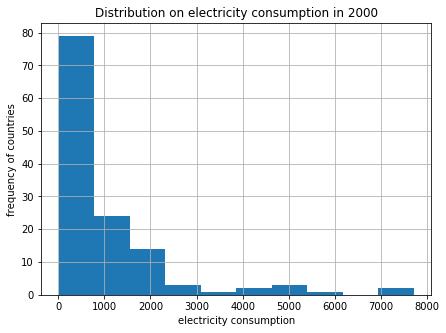

In [38]:
electricity['2000'].hist(figsize=(7, 5))
plt.title('Distribution on electricity consumption in 2000')
plt.xlabel('electricity consumption')
plt.ylabel('frequency of countries');

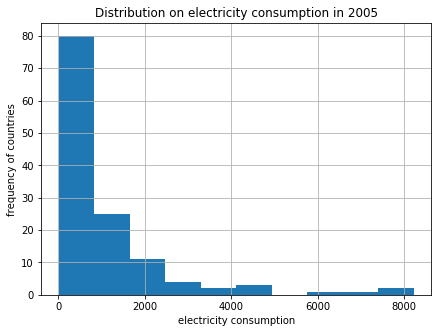

In [39]:
electricity['2005'].hist(figsize=(7, 5))
plt.title('Distribution on electricity consumption in 2005')
plt.xlabel('electricity consumption')
plt.ylabel('frequency of countries');

# Question: How does countries with high electricity consumption differ from countries with low electricity consumption?

>Firstly, I need to define countries with high and low electricity consumption. I will use median value to split them in these two groups:

In [40]:
high_energy_2000 = merged[merged['2000_el'] >= (merged1['2000_el'].median())]
low_energy_2000 = merged[merged['2000_el'] < (merged1['2000_el'].median())]
high_energy_2005 = merged[merged['2005_el'] >= (merged1['2005_el'].median())]
low_energy_2005 = merged[merged['2005_el'] < (merged1['2005_el'].median())]

>Secondly, because in merged table I have 2000 and 2005 years and I don't want them to be always mixed up, I will further separate data based on years as well:

In [41]:
cols = merged.columns
c2000 = (cols[cols.str.contains('2000')])
c2005 = (cols[cols.str.contains('2005')])
c2000

Index(['2000_el', '2000_comp', '2000_phone', '2000_int', '2000_urban',
       '2000_income'],
      dtype='object')

## 1. Difference in regions
### How are different regions (continents) represented in groups of high or low electricity consumption contries?

> Firstly, let's see how are high and low energy countries represented in different continents.

In [42]:
high_energy_2005.groupby('region')['2005_el'].count(), low_energy_2005.groupby('region')['2005_el'].count()

(region
 Africa            2
 Asia             18
 Europe           30
 North America     4
 South America     3
 Name: 2005_el, dtype: int64, region
 Africa           23
 Asia             15
 Europe            3
 North America    10
 South America     7
 Name: 2005_el, dtype: int64)

> We can also view percentages of high or low electricity consumption cases within each region.

In [43]:
round((high_energy_2005.groupby('region')['2005_el'].count()) / (merged.groupby('region')['2005_el'].count())*100, 2)

region
Africa            8.00
Asia             54.55
Europe           90.91
North America    28.57
South America    30.00
Name: 2005_el, dtype: float64

In [44]:
round((low_energy_2005.groupby('region')['2005_el'].count()) / (merged.groupby('region')['2005_el'].count())*100, 2)

region
Africa           92.00
Asia             45.45
Europe            9.09
North America    71.43
South America    70.00
Name: 2005_el, dtype: float64

>Or percentages of regional share within high or low electricity consumption groups

In [45]:
pct_high = round(((high_energy_2005.groupby('region')['2005_el'].count()) / (high_energy_2005.groupby('region')['2005_el'].count().sum())*100), 1)
pct_high

region
Africa            3.5
Asia             31.6
Europe           52.6
North America     7.0
South America     5.3
Name: 2005_el, dtype: float64

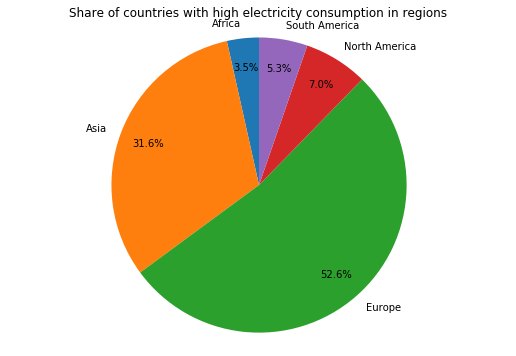

In [46]:
labels = list(pct_high.index)
sizes = list(pct_high.values)
plt.figure(figsize=(9,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.8)
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Share of countries with high electricity consumption in regions");
plt.show()

In [47]:
pct_low = round(((low_energy_2005.groupby('region')['2005_el'].count()) / (low_energy_2005.groupby('region')['2005_el'].count().sum())*100), 1)
pct_low

region
Africa           39.7
Asia             25.9
Europe            5.2
North America    17.2
South America    12.1
Name: 2005_el, dtype: float64

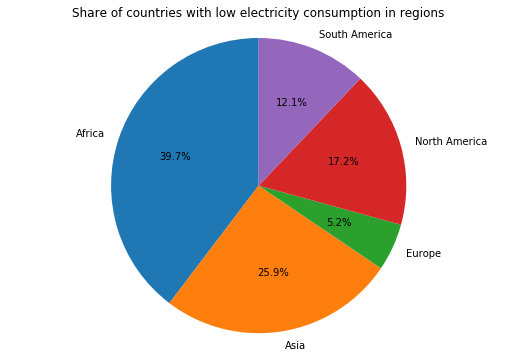

In [48]:
labels = list(pct_low.index)
sizes = list(pct_low.values)
plt.figure(figsize=(9,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Share of countries with low electricity consumption in regions")
plt.show()

### Can we see *mobility* of regions between low and high electricity groups between 2000 and 2005? 

>Now, let's investigate changes in regional distribution from 2000 to 2005.

In [49]:
(high_energy_2005.groupby('region')['2005_el'].count()) - (high_energy_2000.groupby('region')['2000_el'].count())

region
Africa           0
Asia             3
Europe           0
North America   -1
South America   -1
dtype: int64

### In which regions and countries we can see highest increase in electricity consumption between 2000 and 2005?

In [50]:
electricity_change = (merged['2005_el']*100)/(merged['2000_el'])
merged.insert(4, 'el_change', electricity_change)
merged.groupby('region')['el_change'].mean().sort_values(ascending=False)

region
Africa           135.808994
Asia             121.728507
North America    114.200634
South America    112.650828
Europe           112.069179
Name: el_change, dtype: float64

> Which countries experienced the highest increase in electricity consumption?

In [51]:
el_country_max = merged.sort_values(by=['el_change'], ascending=False)
el_country_max.iloc[0:20, 0:5]

,country,2000_el,2005_el,region,el_change
15,Botswana,128.0,345.0,Africa,269.531250
84,Nigeria,38.8,80.0,Africa,206.185567
107,Sudan,21.7,38.3,Africa,176.497696
126,Vietnam,141.0,233.0,Asia,165.248227
23,China,132.0,217.0,Asia,164.393939
19,Cambodia,17.1,28.0,Asia,163.742690
2,Angola,76.1,123.0,Africa,161.629435
98,Senegal,38.5,59.0,Africa,153.246753
12,Benin,24.3,36.9,Africa,151.851852
129,Zimbabwe,197.0,285.0,Africa,144.670051


> Where can we find the TOP 20 countries with the highest increase in electricity consumption?

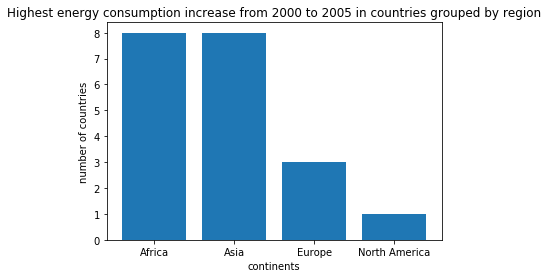

In [52]:
top20_el_change = el_country_max.iloc[0:20, 0:5]
region_top_change = top20_el_change.groupby('region')['region'].count()
plt.bar([1, 2, 3, 4], region_top_change.values, tick_label=region_top_change.index)
plt.title('Highest energy consumption increase from 2000 to 2005 in countries grouped by region')
plt.xlabel('continents')
plt.ylabel('number of countries');

*Summary of difference in region*: Even though electricity consumption is picking up the fastest in African countries, most of African countries belong to low electricity consumption group. Whereas high electricity consumption group consists from 84 % from European and Asian countries. 91 % of European countries, 55 % of Asian countries and only 3,5 % of African countries belong to high electricity group. Between 2000 and 2005 we witnessed 3 Asian countries move from low electricity group to high electricity group.


## 2. Difference in technology and income

### How do high electricity consumption countries differ in ownership of personal computers, phones, proportion of internet users in population, urbanization and level of income?

> I wanted to see how high and low electricity consumption countries differ in technology indicators and income:

In [53]:
high_energy_2005[c2005].mean()

2005_el         1976.333333
2005_comp         31.628947
2005_phone        74.635088
2005_int          38.988421
2005_urban        72.852632
2005_income    33501.754386
dtype: float64

In [54]:
low_energy_2005[c2005].mean()

2005_el         229.608621
2005_comp         4.071034
2005_phone       25.588052
2005_int          6.733624
2005_urban       48.827586
2005_income    6188.500000
dtype: float64

In [55]:
(high_energy_2005[c2005].mean())/(low_energy_2005[c2005].mean())

2005_el        8.607400
2005_comp      7.769265
2005_phone     2.916794
2005_int       5.790109
2005_urban     1.492038
2005_income    5.413550
dtype: float64

>We can see that on average high electrcity countries had in 2005 8,6x higher consumption of electricity, used 7,7x higher number of personal computers per 100 persons, almost 3x higher number of phones per 100 people, had 5,8x higher number of internet users in population and 1,5 higher number of people in population living in urbanised areas while enjoying 5,4 higher income than countries with low electricity consumption. 

In [56]:
### Can we observe low electricity consumption countries cathing up to high electricity countries in terms of tech indicators or income over time, in our case from 2000 to 2005?

>From numbers below we can that this divide between high and low electricity countries was greater in 2000 when looking on phone or computer ownerships and percentage of internet users in population, but stayed quite similar when looking on urbanization of countries or their income.

In [57]:
(high_energy_2000[c2000].mean())/(low_energy_2000[c2000].mean())


2000_el         9.632707
2000_comp      10.977791
2000_phone      7.903439
2000_int       11.313181
2000_urban      1.557455
2000_income     5.539967
dtype: float64

> Mean values may be distorted by extremes. Therefore I would like to see the gap between high and low electricity countries in tech and income indicators also in graphs.

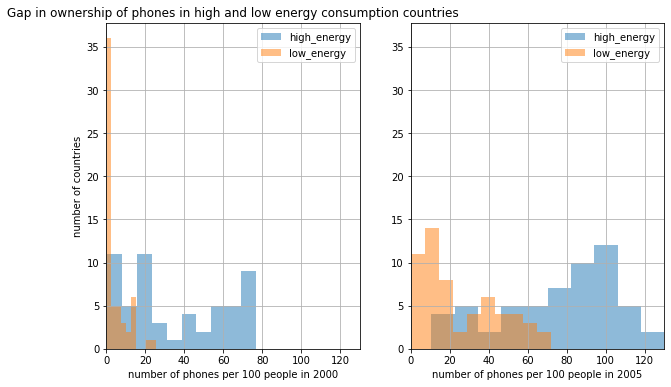

In [58]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
high_energy_2000['2000_phone'].hist(alpha = 0.5, label='high_energy')
low_energy_2000['2000_phone'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 130)
plt.legend()
plt.title('Gap in ownership of phones in high and low energy consumption countries')
plt.xlabel('number of phones per 100 people in 2000')
plt.ylabel('number of countries');


ax2 = plt.subplot(1, 2, 2, sharey=ax1)
high_energy_2005['2005_phone'].hist(alpha = 0.5, label='high_energy')
low_energy_2005['2005_phone'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 130)
plt.legend()
plt.xlabel('number of phones per 100 people in 2005');

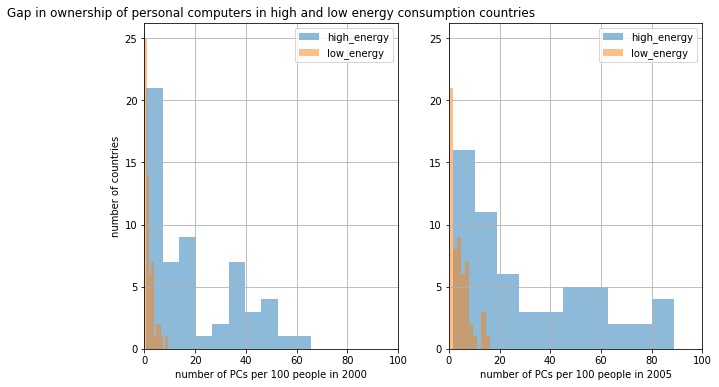

In [59]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
high_energy_2000['2000_comp'].hist(alpha = 0.5, label='high_energy')
low_energy_2000['2000_comp'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 100)
plt.legend()
plt.title('Gap in ownership of personal computers in high and low energy consumption countries')
plt.xlabel('number of PCs per 100 people in 2000')
plt.ylabel('number of countries');


ax2 = plt.subplot(1, 2, 2, sharey=ax1)
high_energy_2005['2005_comp'].hist(alpha = 0.5, label='high_energy')
low_energy_2005['2005_comp'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 100)
plt.legend()
plt.xlabel('number of PCs per 100 people in 2005');

> From 2 graphs above we can observe that gap in ownership of phones and computers between high and low electricity countries is closing much quicker in case of phones.

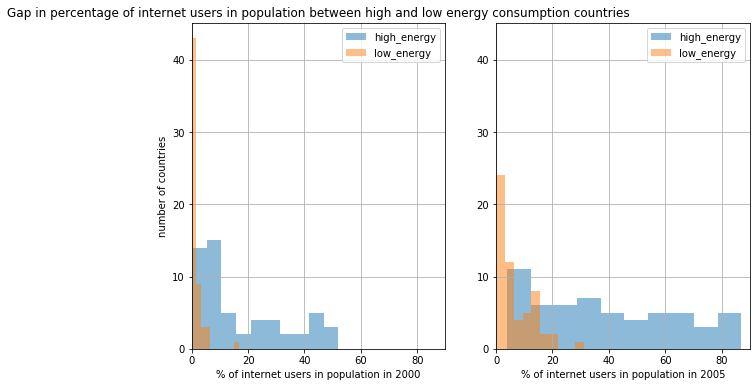

In [60]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
high_energy_2000['2000_int'].hist(alpha = 0.5, label='high_energy')
low_energy_2000['2000_int'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 90)
plt.legend()
plt.title('Gap in percentage of internet users in population between high and low energy consumption countries')
plt.xlabel('% of internet users in population in 2000')
plt.ylabel('number of countries');


ax2 = plt.subplot(1, 2, 2, sharey=ax1)
high_energy_2005['2005_int'].hist(alpha = 0.5, label='high_energy')
low_energy_2005['2005_int'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 90)
plt.xlabel('% of internet users in population in 2005')
plt.legend();

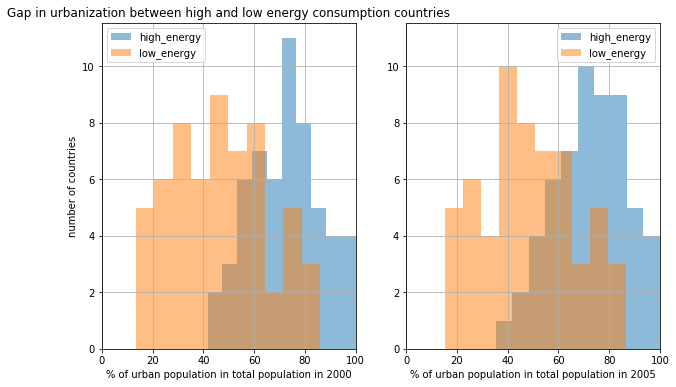

In [61]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
high_energy_2000['2000_urban'].hist(alpha = 0.5, label='high_energy')
low_energy_2000['2000_urban'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 100)
plt.legend()
plt.title('Gap in urbanization between high and low energy consumption countries')
plt.xlabel('% of urban population in total population in 2000')
plt.ylabel('number of countries');


ax2 = plt.subplot(1, 2, 2, sharey=ax1)
high_energy_2005['2005_urban'].hist(alpha = 0.5, label='high_energy')
low_energy_2005['2005_urban'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 100)
plt.xlabel('% of urban population in total population in 2005')
plt.legend();

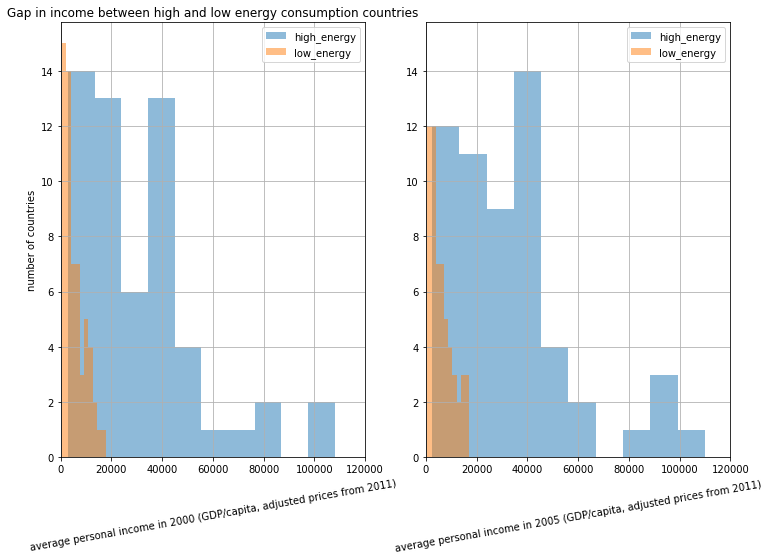

In [62]:
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(1, 2, 1)
high_energy_2000['2000_income'].hist(alpha = 0.5, label='high_energy')
low_energy_2000['2000_income'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 120000)
plt.legend()
plt.title('Gap in income between high and low energy consumption countries')
plt.xlabel('average personal income in 2000 (GDP/capita, adjusted prices from 2011)', rotation=10)
plt.ylabel('number of countries');


ax2 = plt.subplot(1, 2, 2, sharey=ax1)
high_energy_2005['2005_income'].hist(alpha = 0.5, label='high_energy')
low_energy_2005['2005_income'].hist(alpha = 0.5, label='low_energy')
plt.xlim(0, 120000)
plt.xlabel('average personal income in 2005 (GDP/capita, adjusted prices from 2011)', rotation=10)
plt.legend();

> Graphs showing gaps in income and urbanization tell us that divide between high anf low electricity countries remained almost the same in 2000 as in 2005.

### Which variable from tech indicators and income has the strongest correlation with electricity consumption?

In [63]:
cor2000 = merged[c2000].corr()
cor2000.iloc[:,:1]

,2000_el
2000_el,1.000000
2000_comp,0.616212
2000_phone,0.563266
2000_int,0.622258
2000_urban,0.572820
2000_income,0.792821


In [64]:
cor2005 = merged[c2005].corr()
cor2005.iloc[:,:1]

,2005_el
2005_el,1.000000
2005_comp,0.566375
2005_phone,0.536763
2005_int,0.581285
2005_urban,0.555333
2005_income,0.782575


>We can find the higly strong correlation between electricity consumption and income. Then there is medium strong correlation between electricity consumption and percentage of internet users in population and other variables are positively correlated as well, while correlation between electricity consumption and number of phones owned by 100 people is the least strong of them all. Even though differences aren't very big. 

**Summary of difference in technology and income:** We found out there is huge gap between high and low electricity countries in all tech indicators (with exception of urbanization) as well as in income. 
Even though differences in phone and computer ownerships and number of internet users are getting over time smaller, gap in income and urbanized population remains barely unchanged. In 2005 high electricity countries had on average almost 3 times more personal phones and almost 8 times more personal computers than low electricity countries. Income was 5,5 times higher in high electricity countires.

<a id='conclusions'></a>
## Conclusions

> Let's go back to main question: **How does countries with high electricity consumption differ from countries with low electricity consumption?**
- High electricity countries come more often from Europe (53 % of high electrcity group) and Asia (32 %). Low electricity countries can be found mainly in Africa (40 % of low electricity group) and Asia (26 %).
- Electricity consumption was increasing between 2000 and 2005 in all regions, with biggest increase in African countries. Even though all African countries from low electricity group in 2000 have fallen to same cathegory in 2005 as well. Only three Asian countries managed to "move up" from low to high electricty group.
- In 2005 high electricity countries had 8,6 times higher consumption of electricity than low electricity countries.
- In 2005 high electricity countries had 7,7 times higher number of personal computers per 100 people than low electricity countries.
- In 2005 high electricity countries had almost 3 times higher number of personal phones per 100 people than low electricity countries.
- In 2005 high electricity countries had almost 6 times higher percentage of internet users in population than low electricity countries.
-  In 2000 gap in electricity consumption, phone and computer ownership as well as internet usage between high and low electricity countries was greater. 
- In 2000 and 2005 high electrcity countries had around 5,5 higher personal income than people in low electrcity countries.
- Variable personal income has shown the strongest postitive correlation with electricity consumption. 

Last two points may suggest that people from low electricity countries tend to spend more money on home electrical gadgets or appliances when their income is going up, but people from high electricity countries might use higher income for buying rather something else. This is just hypothese. Some other variables not included in my dataset might influence electricity consumption of households. 


### Limitations of analysis

- Many more variables which are not included in dataset could have significant impact on residential electricity consumption (for example, different heating systems at homes, different average temperatures in countries and therefore different needs for electricity etc.)
- We cannot talk much about change over time, because only two years have been selected for data exploration and one year (or both) might be exception from overall trend.
- In terms of regional representation, I had regions with same number of cases or countries, like Europe and Asia, but for other regions only lesser number of cases were included in dataset. Therefore, some findings might be affected by disproportional representation of regions in dataset.